Heart Disease Detection


### Impor dependensi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Koleksi dan Pemrosesan Data

In [3]:
# memuat dataset
heart_disease_data = pd.read_csv("/content/heart_disease_data.csv")

In [5]:
# menampilkan dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


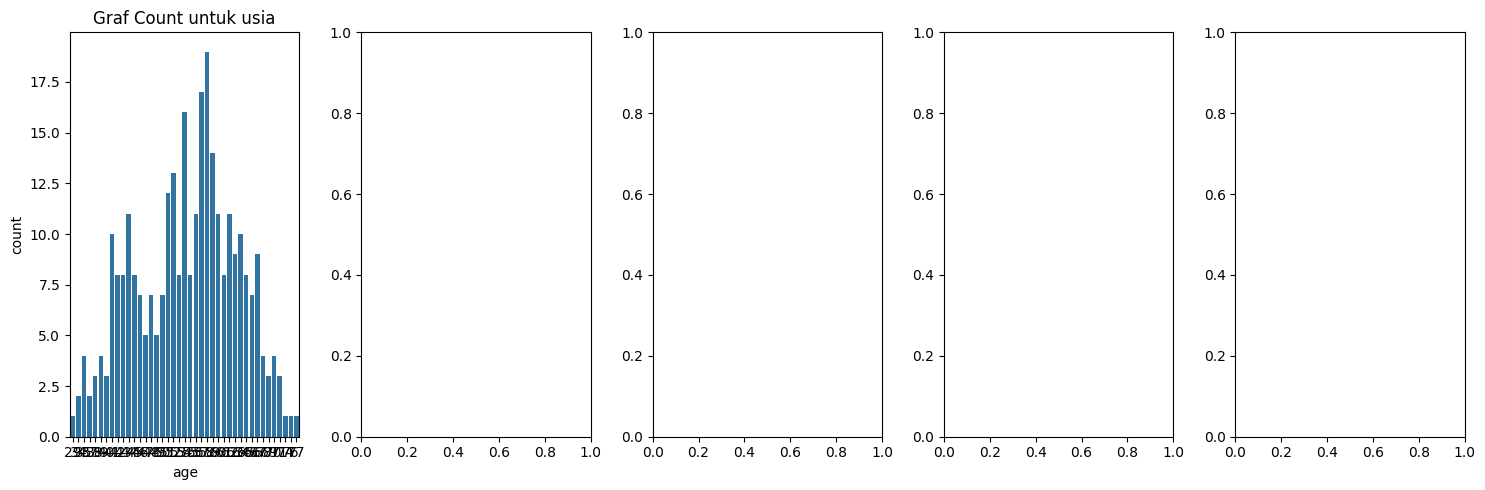

In [6]:
# plot uji coba dengan satu kolom

num_rows, num_cols = 1, 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

col = heart_disease_data["age"]
sns.countplot(x = col, ax = axs[0]) # Menggambarkan jumlah tiap kelompok data
axs[0].set_title("Graf Count untuk usia") # Memberi judul pada grafik

plt.tight_layout() # Mengatur spasi antar grafik
plt.show() # Menampilkan grafik

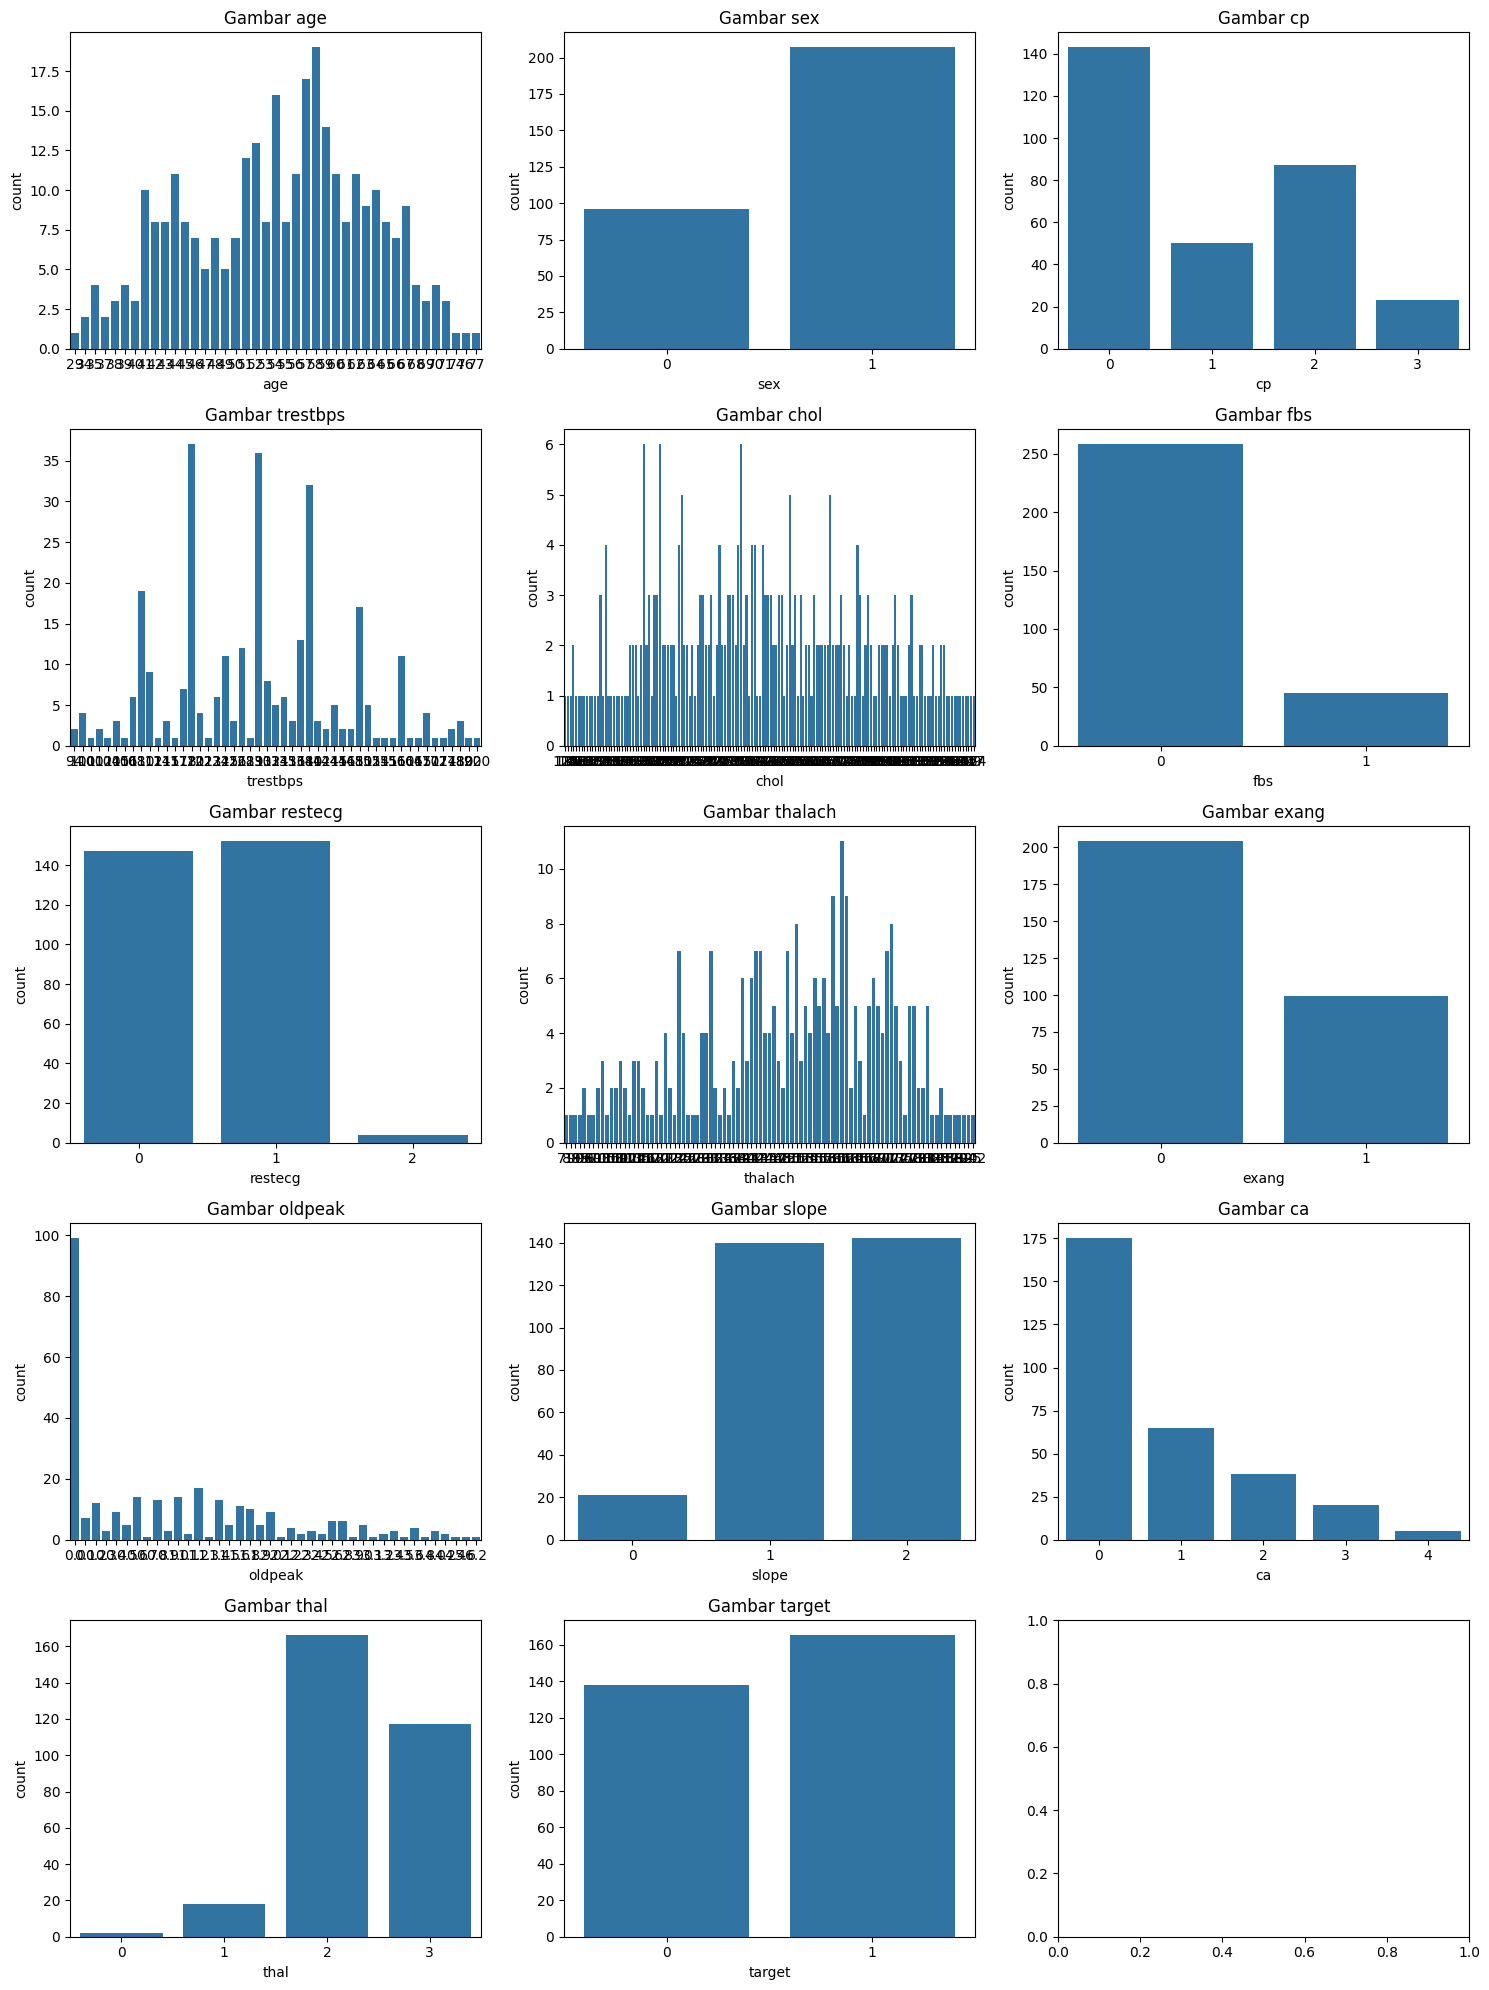

In [8]:
# melakukan otomatisasi untuk dataset penuh

num_baris, num_kolom = 5, 3
fig, axs = plt.subplots(num_baris, num_kolom, figsize=(15, 20))

for indeks, nama_kolom in enumerate(heart_disease_data.columns):
    #if(nama_kolom != "trestbps" and nama_kolom != "chol" and nama_kolom != "thalach" and nama_kolom != "oldpeak"):
        kolom = heart_disease_data[nama_kolom]

        indeks_baris = indeks // num_kolom
        indeks_kolom = indeks % num_kolom

        sns.countplot(x = kolom, ax = axs[indeks_baris, indeks_kolom])
        axs[indeks_baris, indeks_kolom].set_title(f"Gambar {nama_kolom}")


plt.tight_layout()
plt.show()

In [9]:
# jumlah baris dan kolom
heart_disease_data.shape

(303, 14)

In [10]:
# periksa data yang hilang
heart_disease_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
# menampilkan informasi dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# penyebaran data
heart_disease_data["target"].value_counts()

,count
target,
1,165
0,138


In [14]:
# statistik Deskriptif pada dataset
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
# korelasi
correlation = heart_disease_data.corr()
# menampilkan korelasi antar variabel

<Axes: >

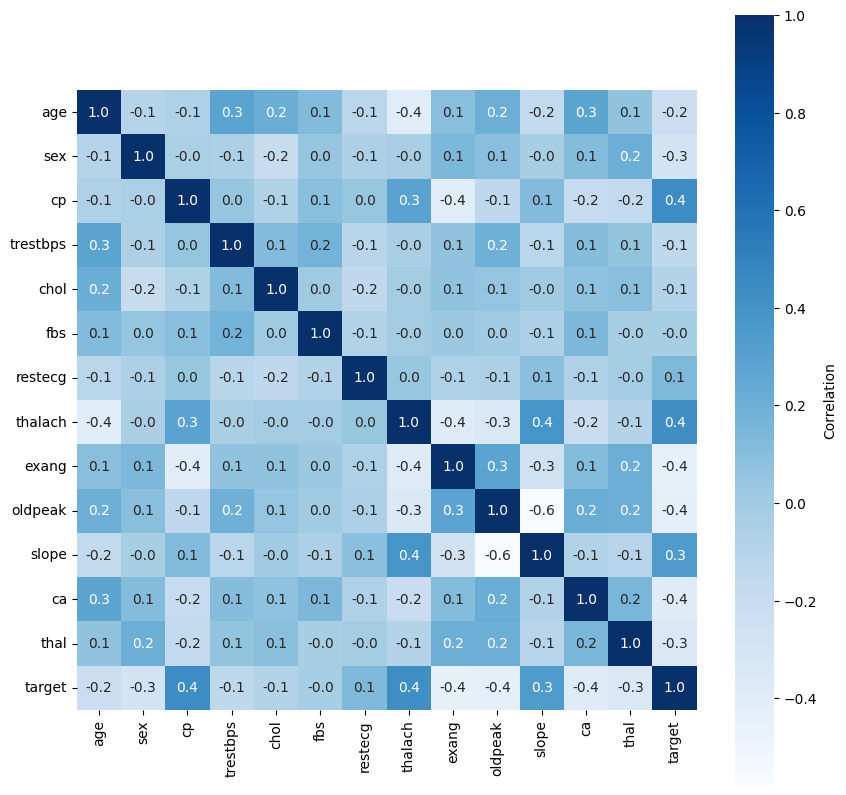

In [21]:
# visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 10}, cmap = "Blues",
            cbar_kws={"label": "Correlation"},
            yticklabels=correlation.columns,
            xticklabels=correlation.columns)

In [22]:
# separating features and target
X = heart_disease_data.drop(["target"], axis = 1)
Y = heart_disease_data["target"]

In [23]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

### Memisahkan data latih dan uji

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [25]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (303, 13)
Train data:  (242, 13)
Test data:  (61, 13)


In [26]:
print(X_train)
print(Y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160      0   0    

### Pengajaran Model menggunakan Logistic Regression

In [27]:
model = LogisticRegression(max_iter = 1000)

In [28]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Penilaian Model

In [29]:
# akurasi pada data training
X_train_prediksi = model.predict(X_train)
akurasi_data_training = accuracy_score(X_train_prediksi, Y_train)
print("Akurasi pada data training: ", akurasi_data_training)

Akurasi pada data training:  0.8553719008264463


In [30]:
# akurasi pada data uji
X_test_prediksi = model.predict(X_test)
data_uji_akurasi = accuracy_score(X_test_prediksi, Y_test)
print("Akurasi pada data uji: ", data_uji_akurasi)

Akurasi pada data uji:  0.8032786885245902


### Sistem Prediksi

In [31]:
# mengambil contoh nilai untuk uji
X_test.iloc[18].values # mengambil baris ke-18 dari X_test dan mengubahnya menjadi array

array([ 39. ,   1. ,   0. , 118. , 219. ,   0. ,   1. , 140. ,   0. ,
         1.2,   1. ,   0. ,   3. ])

In [32]:
# mengecek label sampel
Y_test.iloc[18]

np.int64(0)

In [33]:
# Mengambil data dari baris ke-18
input_data = X_test.iloc[18].values

# Mengubah array numpy menjadi bentuk prediksi untuk satu instance
input_data_reshaped = input_data.reshape(1,-1)

# Melakukan prediksi
prediksi = model.predict(input_data_reshaped)
print(prediksi)

if(prediksi[0] == 0):
    # Jika prediksi bernilai 0, maka tidak ada diagnosis penyakit jantung
    print("Diagnosis menunjukkan tidak ada Penyakit Jantung")
else:
    # Jika prediksi bernilai 1, maka ada diagnosis penyakit jantung
    print("Diagnosis mendeteksi Penyakit Jantung")

[0]
Diagnosis menunjukkan tidak ada Penyakit Jantung


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
